# Kaggle Climate Change Belief Challenge 🌍
Team ZM1
<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://d346xxcyottdqx.cloudfront.net/wp-content/uploads/2020/07/Climate-change-act-1.jpg"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Data-overview" data-toc-modified-id="Data-overview-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data overview</a></span></li></ul></li><li><span><a href="#Importing-the-libraries" data-toc-modified-id="Importing-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the libraries</a></span></li><li><span><a href="#Loading-the-datasets" data-toc-modified-id="Loading-the-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading the datasets</a></span></li><li><span><a href="#Data-Inspection" data-toc-modified-id="Data-Inspection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Inspection</a></span></li><li><span><a href="#Text-Pre-processing" data-toc-modified-id="Text-Pre-processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Text Pre-processing</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

## Introduction  

### Problem Statement

Climate change is transforming how consumers, employees and shareholders evaluate companies and interact with them. In some cases, this can lead to a real shift, where business models need to be reevaluated. 
By understanding how people perceive climate change and whether there beliefs on the matter, can aid businesses in their market research and assist them to understand how their product will be received.

### Objectives
- Create a machine learning model that is able to accurately classify whether or not a person believes climate change is a threat based on their novel tweet data.
- To compete in a Kaggle competition to find the best model for the job.
- To share our findings witih an assessment board and via a Streamlit app to the world.
- To achieve a Micro F1-score higher than 0.7.


### Data overview
- Novel tweet data funded by a Canada Foundation for Innovation project by the University of Waterloo.
- 43 943 tweets from 27/04/2015-21/02/2018
- All Tweets are labelled according to the following class descriptions:
  - 2 News: the tweet links to factual news about climate change 
  - 1 Pro: the tweet supports the belief of man-made climate change 
  - 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change 
  - -1 Anti: the tweet does not believe in man-made climate change 


## Importing the libraries

Here, we import various packages and modules which enable us to pefore many different tasks, such as manipulating the data, viewing the data, performing calculations of the data and visualising the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\court\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Below are packages & modules which we have installed.

Please remove the # to install them


In [ ]:
#!pip install spacy
#!pip install wordcloud
#!pip install nltk

## Loading the datasets

We must now load the data we will be using. The data we have recieved is in .csv (comma separated values) format, so to access the data through python, we use pandas (pd.read).We have 2 files, split into test and train data. The test data is a subset of train, and we use this method to ensure that the models we build are safe from data leakage and therefore, are of better quality.

In [3]:
df_train = pd.read_csv(r"C:\Users\court\Desktop\AdvClassPre\Advanced_Classification_Predict-student_data-2780\train.csv")
df_test = pd.read_csv(r"C:\Users\court\Desktop\AdvClassPre\Advanced_Classification_Predict-student_data-2780\test.csv")

<br></br>

<div align="center" style="width: 800px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://media2.giphy.com/media/k4ZItrTKDPnSU/giphy.gif?cid=ecf05e47un87b9ktbh6obdp7kooy4ish81nxm6n9c19kmnqw&rid=giphy.gif&ct=g"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

## Data Inspection

Lets see what we are working with by using the .head() function to get the first few rows.

In [28]:
# View the first 5 rows of the train data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [29]:
# View the first 5 rows of the test data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [16]:
len(df_train), len(df_test)


(15819, 10546)

We see that the the training set has 15819 tweets and the test set has 10456 tweets

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [33]:
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [34]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [35]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

## Text Pre-processing
Text is the least structured of all the data types available; it contains many sorts of noise and is difficult to analyze without pre-processing. Text preprocessing refers to the entire process of cleaning and standardizing text to make it noise-free and suitable for analysis.

It is predominantly comprised of three steps:

- Noise Removal
- Lexicon Normalization
- Object Standardization

In [15]:
#Converting tweets to lowercase
df_train['message'] = df_train['message'].str.lower()
df_test['message'] = df_test['message'].str.lower()

## EDA 

In [17]:
class_dist

,Count
Pro,8530
News,3640
Neutral,2353
Anti,1296


Text(0.5, 1.0, 'Class description')

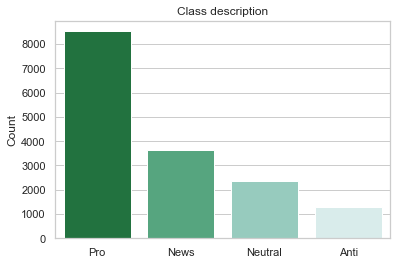

In [14]:
# Create class description dataframe
class_dist = pd.DataFrame(list(df_train['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])

# Plot bar graph to display class description
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="BuGn_r")
plt.title('Class description')